In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [2]:
from sklearn.datasets import make_moons

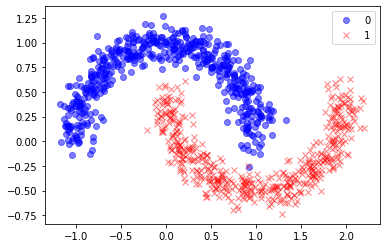

In [4]:
X, y = make_moons(n_samples = 1000, noise=0.1, random_state=0)
plt.plot(X[y==0,0], X[y==0,1],'ob',alpha=0.5)
plt.plot(X[y==1,0], X[y==1,1],'xr',alpha=0.5)
plt.legend(['0','1'])

In [5]:
X.shape

(1000, 2)

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# one layer neural network

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_dim=2,activation='sigmoid')
])
model.compile(tf.keras.optimizers.Adam(lr=0.05), 'binary_crossentropy', metrics = ['accuracy'])

In [17]:
model.fit(X_train,y_train,epochs=200,verbose=0)

In [18]:
results = model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 312us/sample - loss: 0.3176 - accuracy: 0.8467


In [19]:
results

[0.3175977959235509, 0.8466667]

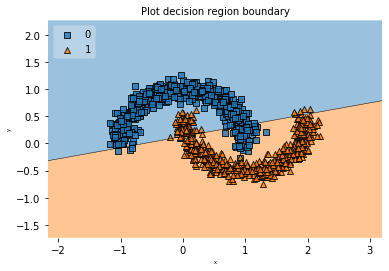

In [20]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel('x',size=5)
plt.ylabel('y',size=5)
plt.title('Plot decision region boundary', size=10)
plt.show()

# three layer neural network

In [21]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(4, input_shape=(2,),activation='tanh'))
model.add(tf.keras.layers.Dense(2,activation='tanh'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))
model.compile(tf.keras.optimizers.Adam(lr=0.05),'binary_crossentropy',metrics=['accuracy'])

In [22]:
model.fit(X_train, y_train, epochs = 100, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

300/300 [==============================] - 0s 394us/sample - loss: 0.0014 - accuracy: 1.0000


[0.001381490431376733, 1.0]

In [24]:
from sklearn.metrics import accuracy_score

In [28]:
y_train_pred = model.predict_classes(X_train)
y_test_pred = model.predict_classes(X_test)

print('The Accuracy score on the Train set is:\t{:0.3f}'.format(accuracy_score(y_train, y_train_pred)))
print('The Accuracy score on the Test set is:\t{:0.3f}'.format(accuracy_score(y_test,y_test_pred)))

The Accuracy score on the Train set is:	0.999
The Accuracy score on the Test set is:	1.000


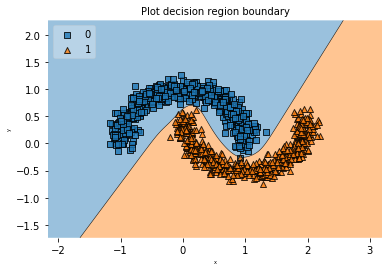

In [30]:
plot_decision_regions(X=X, y=y, clf=model, legend=2)
plt.xlabel('x',size=5)
plt.ylabel('y',size=5)
plt.title('Plot decision region boundary', size=10)
plt.show()